<a href="https://colab.research.google.com/github/amirjhn/MachineLearning2025/blob/main/mini_projects/mini_project_1_p1/q2_mini_project1_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# part 1
#https://drive.google.com/file/d/172qsBrIM5UpTaRXWo2Yg6NN1fgw10t5w/view?usp=sharing
!gdown 172qsBrIM5UpTaRXWo2Yg6NN1fgw10t5w

Downloading...
From: https://drive.google.com/uc?id=172qsBrIM5UpTaRXWo2Yg6NN1fgw10t5w
To: /content/data_banknote_authentication.txt
100% 46.4k/46.4k [00:00<00:00, 91.5MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression , SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
'''
read_file = pd.read_csv (r'/content/data_banknote_authentication.txt')
read_file.to_csv (r'/content/data_banknote_authentication.csv')
df = pd.read_csv("/content/data_banknote_authentication.csv")
df
'''

,Unnamed: 0,3.6216,8.6661,-2.8073,-0.44699,0
0,0,4.54590,8.16740,-2.4586,-1.46210,0
1,1,3.86600,-2.63830,1.9242,0.10645,0
2,2,3.45660,9.52280,-4.0112,-3.59440,0
3,3,0.32924,-4.45520,4.5718,-0.98880,0
4,4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...,...
1366,1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,1369,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
# part 2
file = pd.read_csv (r'/content/data_banknote_authentication.txt')
#file = read_file.to_csv (r'/content/data_banknote_authentication.csv')
headerlist = ['part1' , 'part2','part3','part4','part5']
file.to_csv("/content/data_banknote_authentication.csv" ,header = headerlist)
df = pd.read_csv("/content/data_banknote_authentication.csv")
df = shuffle(df)
df

,Unnamed: 0,part1,part2,part3,part4,part5
287,287,0.44125,2.94870,4.32250,0.71550,0
1030,1030,-1.85540,-9.60350,7.77640,-0.97716,1
420,420,-1.14970,1.29540,7.70100,0.62627,0
107,107,3.10600,9.54140,-4.25360,-4.00300,0
923,923,1.59040,2.21210,-3.11830,-0.11725,1
...,...,...,...,...,...,...
518,518,3.46690,6.87000,-1.05680,-0.73147,0
908,908,-1.73220,-9.28280,7.71900,-1.71680,1
589,589,4.63520,-3.00870,2.67730,1.21200,0
444,444,3.18870,-3.41430,2.77420,-0.20260,0


In [ ]:
X = df[['part1' , 'part2','part3','part4']].values
y = df[['part5']].values
X ,y

(array([[ 0.44125,  2.9487 ,  4.3225 ,  0.7155 ],
        [-1.8554 , -9.6035 ,  7.7764 , -0.97716],
        [-1.1497 ,  1.2954 ,  7.701  ,  0.62627],
        ...,
        [ 4.6352 , -3.0087 ,  2.6773 ,  1.212  ],
        [ 3.1887 , -3.4143 ,  2.7742 , -0.2026 ],
        [ 0.26637,  0.73252, -0.67891,  0.03533]]),
 array([[0],
        [1],
        [0],
        ...,
        [0],
        [0],
        [1]]))

In [ ]:
X.shape , y.shape

((1371, 4), (1371, 1))

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((1096, 4), (275, 4), (1096, 1), (275, 1))

In [ ]:
def sigmoid(score):
    return 1/(1+np.exp(-score))

In [ ]:
def logistic_regression(x , w):
  p = sigmoid(x @ w)
  return p

In [ ]:
def calculate_error(y,p):
    cross_entropy = -(np.mean(y*np.log(p) + (1-y)*np.log(1-p)))
    return cross_entropy

In [ ]:
def gradient(x , y  ,p):
  grads = (x.T @(p - y)) / len(y)
  return grads

In [ ]:
def gradient_descent(w , eta , grads):
  w -= eta*grads
  return w

In [ ]:
x_train = np.hstack((np.ones((len(x_train) , 1)) , x_train))
x_train.shape

(1096, 5)

In [ ]:
m = 4
w = np.random.randn(m+1 , 1)
print(w.shape)
eta = 0.01
n_epochs = 2000

(5, 1)


In [ ]:
error_hist = []
for epoch in range(n_epochs):
  p = logistic_regression(x_train , w)
  e = calculate_error(y_train , p)
  error_hist.append(e)
  grads = gradient(x_train , y_train , p)
  w = gradient_descent(w , eta , grads)
  if(epoch + 1) % 100 == 0:
    print(f"Epoch = {epoch} , \t E = {e} \t w={w.T[0]}")

Epoch = 99 , 	 E = 0.4803149611507901 	 w=[ 0.65608943 -1.03567698 -0.04067966  0.26721612  0.01635231]
Epoch = 199 , 	 E = 0.1784803033954892 	 w=[ 0.63564818 -1.04794466 -0.25134719 -0.20747226  0.05812701]
Epoch = 299 , 	 E = 0.13314003471670716 	 w=[ 0.66199394 -1.06949518 -0.34538897 -0.38707848  0.04363592]
Epoch = 399 , 	 E = 0.11738489847540806 	 w=[ 0.69963307 -1.10279446 -0.41426237 -0.47377923  0.01780804]
Epoch = 499 , 	 E = 0.10774032154421613 	 w=[ 0.73951395 -1.13787862 -0.46658178 -0.53106274 -0.0093574 ]
Epoch = 599 , 	 E = 0.1006443647252312 	 w=[ 0.77894075 -1.17158675 -0.50879414 -0.57556507 -0.03417148]
Epoch = 699 , 	 E = 0.09503308788578306 	 w=[ 0.81710365 -1.20318399 -0.54454523 -0.6129377  -0.05576701]
Epoch = 799 , 	 E = 0.09041691910043909 	 w=[ 0.85379937 -1.23265507 -0.57580768 -0.64568427 -0.07424495]
Epoch = 899 , 	 E = 0.0865165854065115 	 w=[ 0.88903345 -1.26018812 -0.60373189 -0.67512105 -0.0899789 ]
Epoch = 999 , 	 E = 0.0831546096473055 	 w=[ 0.9228

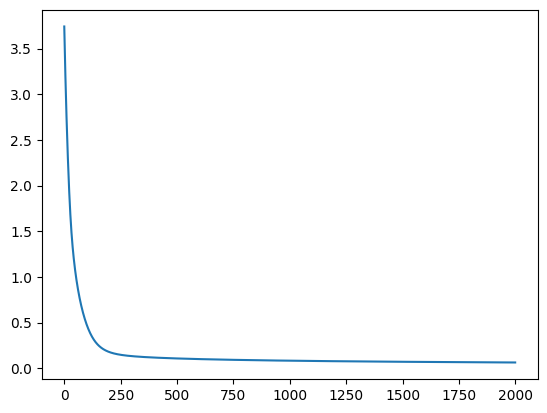

In [ ]:
plt.plot(error_hist)

In [ ]:
def accuracy(y , y_hat):
  acc = np.sum(y==np.round(y_hat)) / len(y)
  return acc

In [ ]:
x_test = np.hstack((np.ones((len(x_test) , 1)), x_test))
p = logistic_regression(x_test , w)
accuracy(y_test , p)

0.9745454545454545

In [ ]:
# part 4
maxx = df[['part1' , 'part2','part3','part4']].max()

minn = df[['part1' , 'part2','part3','part4']].min()

for i in range(4):
  df[f'part{i+1}'] = (df[f'part{i+1}']-minn[i])/(maxx[i]- minn[i])
  print(df[f'part{i+1}'])

287     0.539656
1030    0.374035
420     0.424926
107     0.731822
923     0.622526
          ...   
518     0.757848
908     0.382919
589     0.842099
444     0.737786
1122    0.527044
Name: part1, Length: 1371, dtype: float64
287     0.625706
1030    0.156020
420     0.563842
107     0.872395
923     0.598143
          ...   
518     0.772435
908     0.168021
589     0.402788
444     0.387611
1122    0.542780
Name: part2, Length: 1371, dtype: float64
287     0.413923
1030    0.562711
420     0.559463
107     0.044478
923     0.093385
          ...   
518     0.182191
908     0.560239
589     0.343050
444     0.347225
1122    0.198470
Name: part3, Length: 1371, dtype: float64
287     0.842331
1030    0.688420
420     0.834217
107     0.413286
923     0.766610
          ...   
518     0.710760
908     0.621166
589     0.887476
444     0.758850
1122    0.780484
Name: part4, Length: 1371, dtype: float64


In [ ]:
X = df[['part1' , 'part2','part3','part4']].values

y = df[["part5"]].values
X , y

(array([[0.53965558, 0.62570581, 0.41392293, 0.84233067],
        [0.37403457, 0.15602046, 0.56271135, 0.68842031],
        [0.42492554, 0.56384169, 0.55946324, 0.83421715],
        ...,
        [0.84209881, 0.40278843, 0.34305038, 0.88747647],
        [0.73778566, 0.38761146, 0.34722468, 0.75884958],
        [0.52704426, 0.54277953, 0.19847029, 0.7804841 ]]),
 array([[0],
        [1],
        [0],
        ...,
        [0],
        [0],
        [1]]))

In [ ]:
# part 5
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((1096, 4), (275, 4), (1096, 1), (275, 1))

In [ ]:
x_train = np.hstack((np.ones((len(x_train) , 1)) , x_train))
x_train.shape

(1096, 5)

In [ ]:
m = 4
w = np.random.randn(m+1 , 1)
print(w.shape)
eta = 0.01
n_epochs = 10000

(5, 1)


In [ ]:
error_hist = []
for epoch in range(n_epochs):
  p = logistic_regression(x_train , w)
  e = calculate_error(y_train , p)
  error_hist.append(e)
  grads = gradient(x_train , y_train , p)
  w = gradient_descent(w , eta , grads)
  if(epoch + 1) % 100 == 0:
    print(f"Epoch = {epoch} , \t E = {e:.4} \t w={w.T[0]}")

Epoch = 99 , 	 E = 1.067 	 w=[ 0.36888162  1.24063431  0.83986613 -0.67044714 -0.38016265]
Epoch = 199 , 	 E = 0.8898 	 w=[ 0.12958604  1.02356214  0.63336978 -0.70991275 -0.53839637]
Epoch = 299 , 	 E = 0.8163 	 w=[-0.00458392  0.86467387  0.48872109 -0.71928905 -0.62441729]
Epoch = 399 , 	 E = 0.7846 	 w=[-0.07042788  0.7445765   0.38551056 -0.71012292 -0.66397295]
Epoch = 499 , 	 E = 0.7678 	 w=[-0.09550925  0.64812187  0.30770317 -0.69044756 -0.67611366]
Epoch = 599 , 	 E = 0.7564 	 w=[-0.09680376  0.56582423  0.24520676 -0.66503628 -0.67246976]
Epoch = 699 , 	 E = 0.747 	 w=[-0.08426937  0.49207923  0.19203613 -0.63663798 -0.65982298]
Epoch = 799 , 	 E = 0.7384 	 w=[-0.06371481  0.42360743  0.144679   -0.60684041 -0.64211273]
Epoch = 899 , 	 E = 0.7303 	 w=[-0.03854288  0.35848464  0.1010694  -0.57656777 -0.62163892]
Epoch = 999 , 	 E = 0.7225 	 w=[-0.01075619  0.29557688  0.05998625 -0.54636045 -0.59975014]
Epoch = 1099 , 	 E = 0.7149 	 w=[ 0.01846341  0.23421338  0.02070421 -0.5

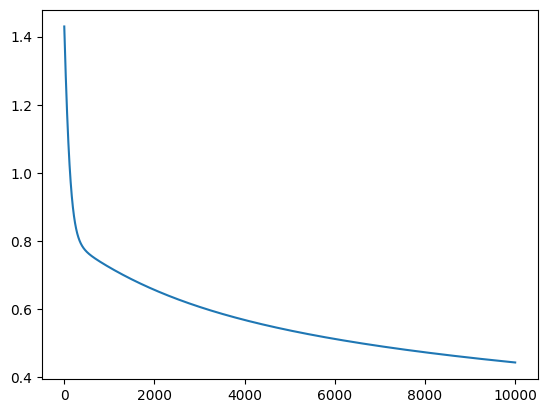

In [ ]:
plt.plot(error_hist)

In [ ]:
x_test = np.hstack((np.ones((len(x_test) , 1)), x_test))
x_test.shape

(275, 5)

In [ ]:
p = logistic_regression(x_test , w)
accuracy(y_test , p)

0.850909090909091

<Axes: >

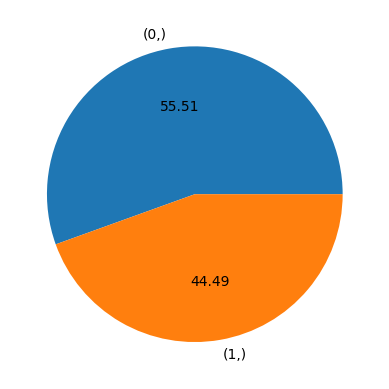

In [ ]:
# part 6
new_y = pd.DataFrame(y, columns=['Column_A'])
new_y.value_counts()
new_y.value_counts().plot.pie(autopct = "%.2f")

In [ ]:
! pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


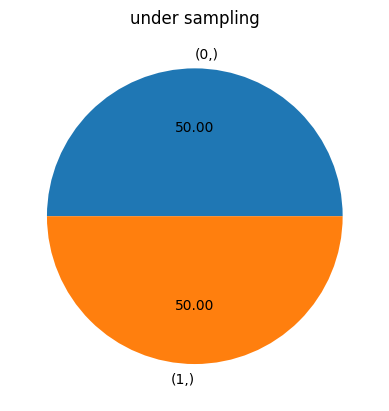

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

y = pd.DataFrame(y, columns=[''])
rus = RandomUnderSampler(sampling_strategy=1)
x_res_undersampling , y_res_undersampling = rus.fit_resample(X , y)
ax = y_res_undersampling.value_counts().plot.pie(autopct = '%.2f')
_ = ax.set_title("under sampling")

In [ ]:
# part 7

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = x_res_undersampling
y = y_res_undersampling
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

In [ ]:
model = LogisticRegression()
model.fit(X , y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_hat = model.predict(x_test)
model.score(x_test , y_test)
y_test.shape ,
y_hat = y_hat.reshape(244 , 1)
y_test.shape , y_hat.shape

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat)
score

0.9795081967213115

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression , SGDClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = df[['part1' , 'part2','part3','part4']].values
y = df[["part5"]].values
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)
model = LogisticRegression(random_state = 93, solver='sag', max_iter=200)
model.fit(X , y)
y_hat = model.predict(x_test)
model.score(x_test , y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9818181818181818